## EW submission Project 2

In [2099]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from numbers import Number

%matplotlib inline

In [2100]:
df = pd.read_csv('..//project-2//datasets//train.csv')

In [2101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [2102]:
df.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [2103]:
#Column names to lowercase and no spaces
df.rename(columns= lambda x: x.replace(' ', '_'), inplace=True)
df.columns = df.columns.str.lower()
len(df.columns)

81

In [2104]:
#Checking for nulls/Nans
#Return Columns with NaN values
df.isnull().sum()[df.isnull().sum() != 0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [2105]:
# Data Cleaning of columns based on Documentation
#    If the column was a catergorial/string, we gave flags 1 for non-nan values.
#    If the column was continous and a value of 0 was justifiable (such as not having a basement), NaNs were replaced with 0.
#Arguably, we may not want to add nobasement data to basement data, however for larger correlative analysis it will provide a
#greater aggregate view.
#    If the column had documentatation which explained NA values, it was addressed accordingly.

In [2106]:
# Lots Frontage -> Flag
#Creating flag for Lot Frontage instead. (Unknown if data is missing or actually 0. Data suggests 0 as no datapoint has 0 value)
df['lot_frontage_flag'] = [1 if x >= 0 else 0 for x in df.lot_frontage]
df.lot_frontage_flag.value_counts()

1    1721
0     330
Name: lot_frontage_flag, dtype: int64

In [2107]:
#Alley NaN -> FillNA with NoAlley (No Alley)
df.alley.fillna('Noalley', inplace =True)

In [2108]:
#Masonary Veneer -> Flag
df.mas_vnr_type.isnull().sum()
df['mas_vnr_type_flag'] = [0 if x != str(x) else 1 for x in df.mas_vnr_type]
print(df['mas_vnr_type_flag'].value_counts())

1    2029
0      22
Name: mas_vnr_type_flag, dtype: int64


In [2109]:
#Masonary area - > FillNA with 0 (Rows with NA veneer are same as area. Imply No Veener == 0 area)
df['mas_vnr_area'].fillna('0', inplace =True)

In [2110]:
#Basement Qualtiy -> FillNA with Nobase (No Basement)
df['bsmt_qual'] = [x if x == str(x) else 'Nobase' for x in df.bsmt_qual]
df.bsmt_qual.value_counts()

TA        887
Gd        864
Ex        184
Fa         60
Nobase     55
Po          1
Name: bsmt_qual, dtype: int64

In [2111]:
#Basement Condition - > FillNA with Nobase (No Basement)
df['bsmt_cond'] = [x if x == str(x) else 'Nobase' for x in df.bsmt_cond]
df.bsmt_cond.value_counts()

TA        1834
Gd          89
Fa          65
Nobase      55
Po           5
Ex           3
Name: bsmt_cond, dtype: int64

In [2112]:
#Basement Exposure - > FillNA with Nobase (No Basement)
df['bsmt_exposure'] = [x if x == str(x) else 'Nobase' for x in df.bsmt_exposure]
df.bsmt_exposure.value_counts()

No        1339
Av         288
Gd         203
Mn         163
Nobase      58
Name: bsmt_exposure, dtype: int64

In [2113]:
#Basement Type 1 - > FillNA with Nobase (No Basement)
df['bsmtfin_type_1'] = [x if x == str(x) else 'Nobase' for x in df.bsmtfin_type_1]
df.bsmtfin_type_1.value_counts()

GLQ       615
Unf       603
ALQ       293
BLQ       200
Rec       183
LwQ       102
Nobase     55
Name: bsmtfin_type_1, dtype: int64

In [2114]:
#Basement Type 1 - > FillNA with Nobase (No Basement)
df['bsmtfin_type_1'] = [x if x == str(x) else 'Nobase' for x in df.bsmtfin_type_1]
df.bsmtfin_type_1.value_counts()

GLQ       615
Unf       603
ALQ       293
BLQ       200
Rec       183
LwQ       102
Nobase     55
Name: bsmtfin_type_1, dtype: int64

In [2115]:
#Basement type1 finished sqft - > FillNA with 0 (Checked out and says No Basement)
df[df.bsmtfin_sf_1.isnull() == True]['bsmtfin_type_1']
df['bsmtfin_sf_1'].fillna('0', inplace =True)
df.bsmtfin_sf_1.isnull().sum()

0

In [2116]:
#Basement Type 2 - > FillNA with Nobase (No Basement)
df['bsmtfin_type_2'] = [x if x == str(x) else 'Nobase' for x in df.bsmtfin_type_2]
df.bsmtfin_type_2.value_counts()

Unf       1749
Rec         80
LwQ         60
Nobase      56
BLQ         48
ALQ         35
GLQ         23
Name: bsmtfin_type_2, dtype: int64

In [2117]:
#Basement type2 finished sqft - > FillNA with 0 (Checked out and says  No Basement)
df[df.bsmtfin_sf_2.isnull() == True]['bsmtfin_type_2']
df['bsmtfin_sf_2'].fillna('0', inplace =True)
df.bsmtfin_sf_1.isnull().sum()

0

In [2118]:
#Basement unfinished sqft - > FillNA with 0 (Checked out and says No Basement)
df[df.bsmt_unf_sf.isnull() == True]['bsmt_qual']
df['bsmt_unf_sf'].fillna('0', inplace =True)
df.bsmt_unf_sf.isnull().sum()

0

In [2119]:
#Total Basement Sq.Ft - > FillNA with 0 (Checked out and says No Basement)
df[df.total_bsmt_sf.isnull() == True]['total_bsmt_sf']
df['total_bsmt_sf'].fillna('0', inplace =True)
df.total_bsmt_sf.isnull().sum()

0

In [2120]:
#Basement Full bath discrete - Flag
df['bsmt_full_bath_flag'] = [1 if x >= 0 else 0 for x in df['bsmt_full_bath']]
df.bsmt_full_bath_flag.value_counts()

1    2049
0       2
Name: bsmt_full_bath_flag, dtype: int64

In [2121]:
#Basement half bath discrete - Flag
df['bsmt_half_bath_flag'] = [1 if x >= 0 else 0 for x in df['bsmt_half_bath']]
df.bsmt_half_bath_flag.value_counts()

1    2049
0       2
Name: bsmt_half_bath_flag, dtype: int64

In [2122]:
#Fireplace Quality - > FillNA with Nofp (No Fireplace)
df['fireplace_qu'] = [x if x == str(x) else 'Nofp' for x in df.fireplace_qu]
df.fireplace_qu.value_counts()

Nofp    1000
Gd       523
TA       407
Fa        59
Po        31
Ex        31
Name: fireplace_qu, dtype: int64

In [2123]:
#Garage Type -> Fillna Nog(No garage)
df.garage_type.fillna('Nog', inplace = True)
df.garage_type.value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Nog         113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [2124]:
#Garage year built - > Flag
df['garage_yr_blt_flag'] = [1 if x == float(x) else 0 for x in df.garage_yr_blt]
df.garage_yr_blt_flag.value_counts()

1    1937
0     114
Name: garage_yr_blt_flag, dtype: int64

In [2125]:
#Garage finish - > FillNA Nog (No garage)
df.garage_finish.fillna('Nog', inplace=True)
df.garage_finish.value_counts()

Unf    849
RFn    579
Fin    509
Nog    114
Name: garage_finish, dtype: int64

In [2126]:
# Number of cars garage can fit -> FillNA 
df.garage_cars.fillna(0, inplace =True)
df.garage_cars.value_counts()

2.0    1136
1.0     524
3.0     263
0.0     114
4.0      13
5.0       1
Name: garage_cars, dtype: int64

In [2127]:
# Size of garage -> FillNA
df.garage_area.fillna(0, inplace=True)
df.garage_area.isnull().sum()

0

In [2128]:
#Garage Quality - > FillNA Nog (No garage)
df.garage_qual.fillna('Nog', inplace=True)
df.garage_qual.isnull().sum()

0

In [2129]:
#Garage Condition -> FillNa Nog (No Garage)
df.garage_cond.fillna('Nog', inplace=True)
df.garage_cond.value_counts()

TA     1868
Nog     114
Fa       47
Gd       12
Po        8
Ex        2
Name: garage_cond, dtype: int64

In [2130]:
#Pool Quality -> Fillna NP (No Pool)
df.pool_qc.fillna('NP', inplace=True)
df.pool_qc.value_counts()

NP    2042
Gd       4
TA       2
Fa       2
Ex       1
Name: pool_qc, dtype: int64

In [2131]:
#Fence -> FillNA NF (No Fence)
df.fence.fillna('NF', inplace=True)
df.fence.value_counts()

NF       1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: fence, dtype: int64

In [2132]:
#misc_feature - > Flag 
df['misc_feature_flag'] = [1 if x == str(x) else 0 for x in df.misc_feature]
df['misc_feature_flag'].value_counts()

0    1986
1      65
Name: misc_feature_flag, dtype: int64

In [2133]:
#Returns a list of still exisiting NAs that are flagged
df.isnull().sum()[df.isnull().sum() != 0]

lot_frontage       330
mas_vnr_type        22
bsmt_full_bath       2
bsmt_half_bath       2
garage_yr_blt      114
misc_feature      1986
dtype: int64

In [2134]:
#Fixing data types seen by dummy set 
df.mas_vnr_area = [int(x) for x in df.mas_vnr_area]
df.bsmtfin_sf_1 = [int(x) for x in df.bsmtfin_sf_1]
df.bsmtfin_sf_2 = [int(x) for x in df.bsmtfin_sf_2]
df.bsmt_unf_sf = [int(x) for x in df.bsmt_unf_sf]
df.total_bsmt_sf = [int(x) for x in df.total_bsmt_sf]

In [2135]:
# Getting dummies for catergorial values 
dummylist=[]
for x in range(0, len(df.columns)):
    if df.dtypes[x] == object:
        dummylist.append(df.columns[x])

In [2136]:
df = pd.get_dummies(df, columns= dummylist, drop_first=True)
df.head().T

,0,1,2,3,4
id,109.0,544.0,153.0,318.0,255.0
pid,533352170.0,531379050.0,535304180.0,916386060.0,906425045.0
ms_subclass,60.0,60.0,20.0,60.0,50.0
lot_frontage,NaN,43.0,68.0,73.0,82.0
lot_area,13517.0,11492.0,7922.0,9802.0,14235.0
overall_qual,6.0,7.0,5.0,5.0,6.0
overall_cond,8.0,5.0,7.0,5.0,8.0
year_built,1976.0,1996.0,1953.0,2006.0,1900.0
year_remod/add,2005.0,1997.0,2007.0,2007.0,1993.0
mas_vnr_area,289.0,132.0,0.0,0.0,0.0


In [2137]:
#Setting X and y for visualization 
features = df.columns
X = df[features]
y = df['saleprice']

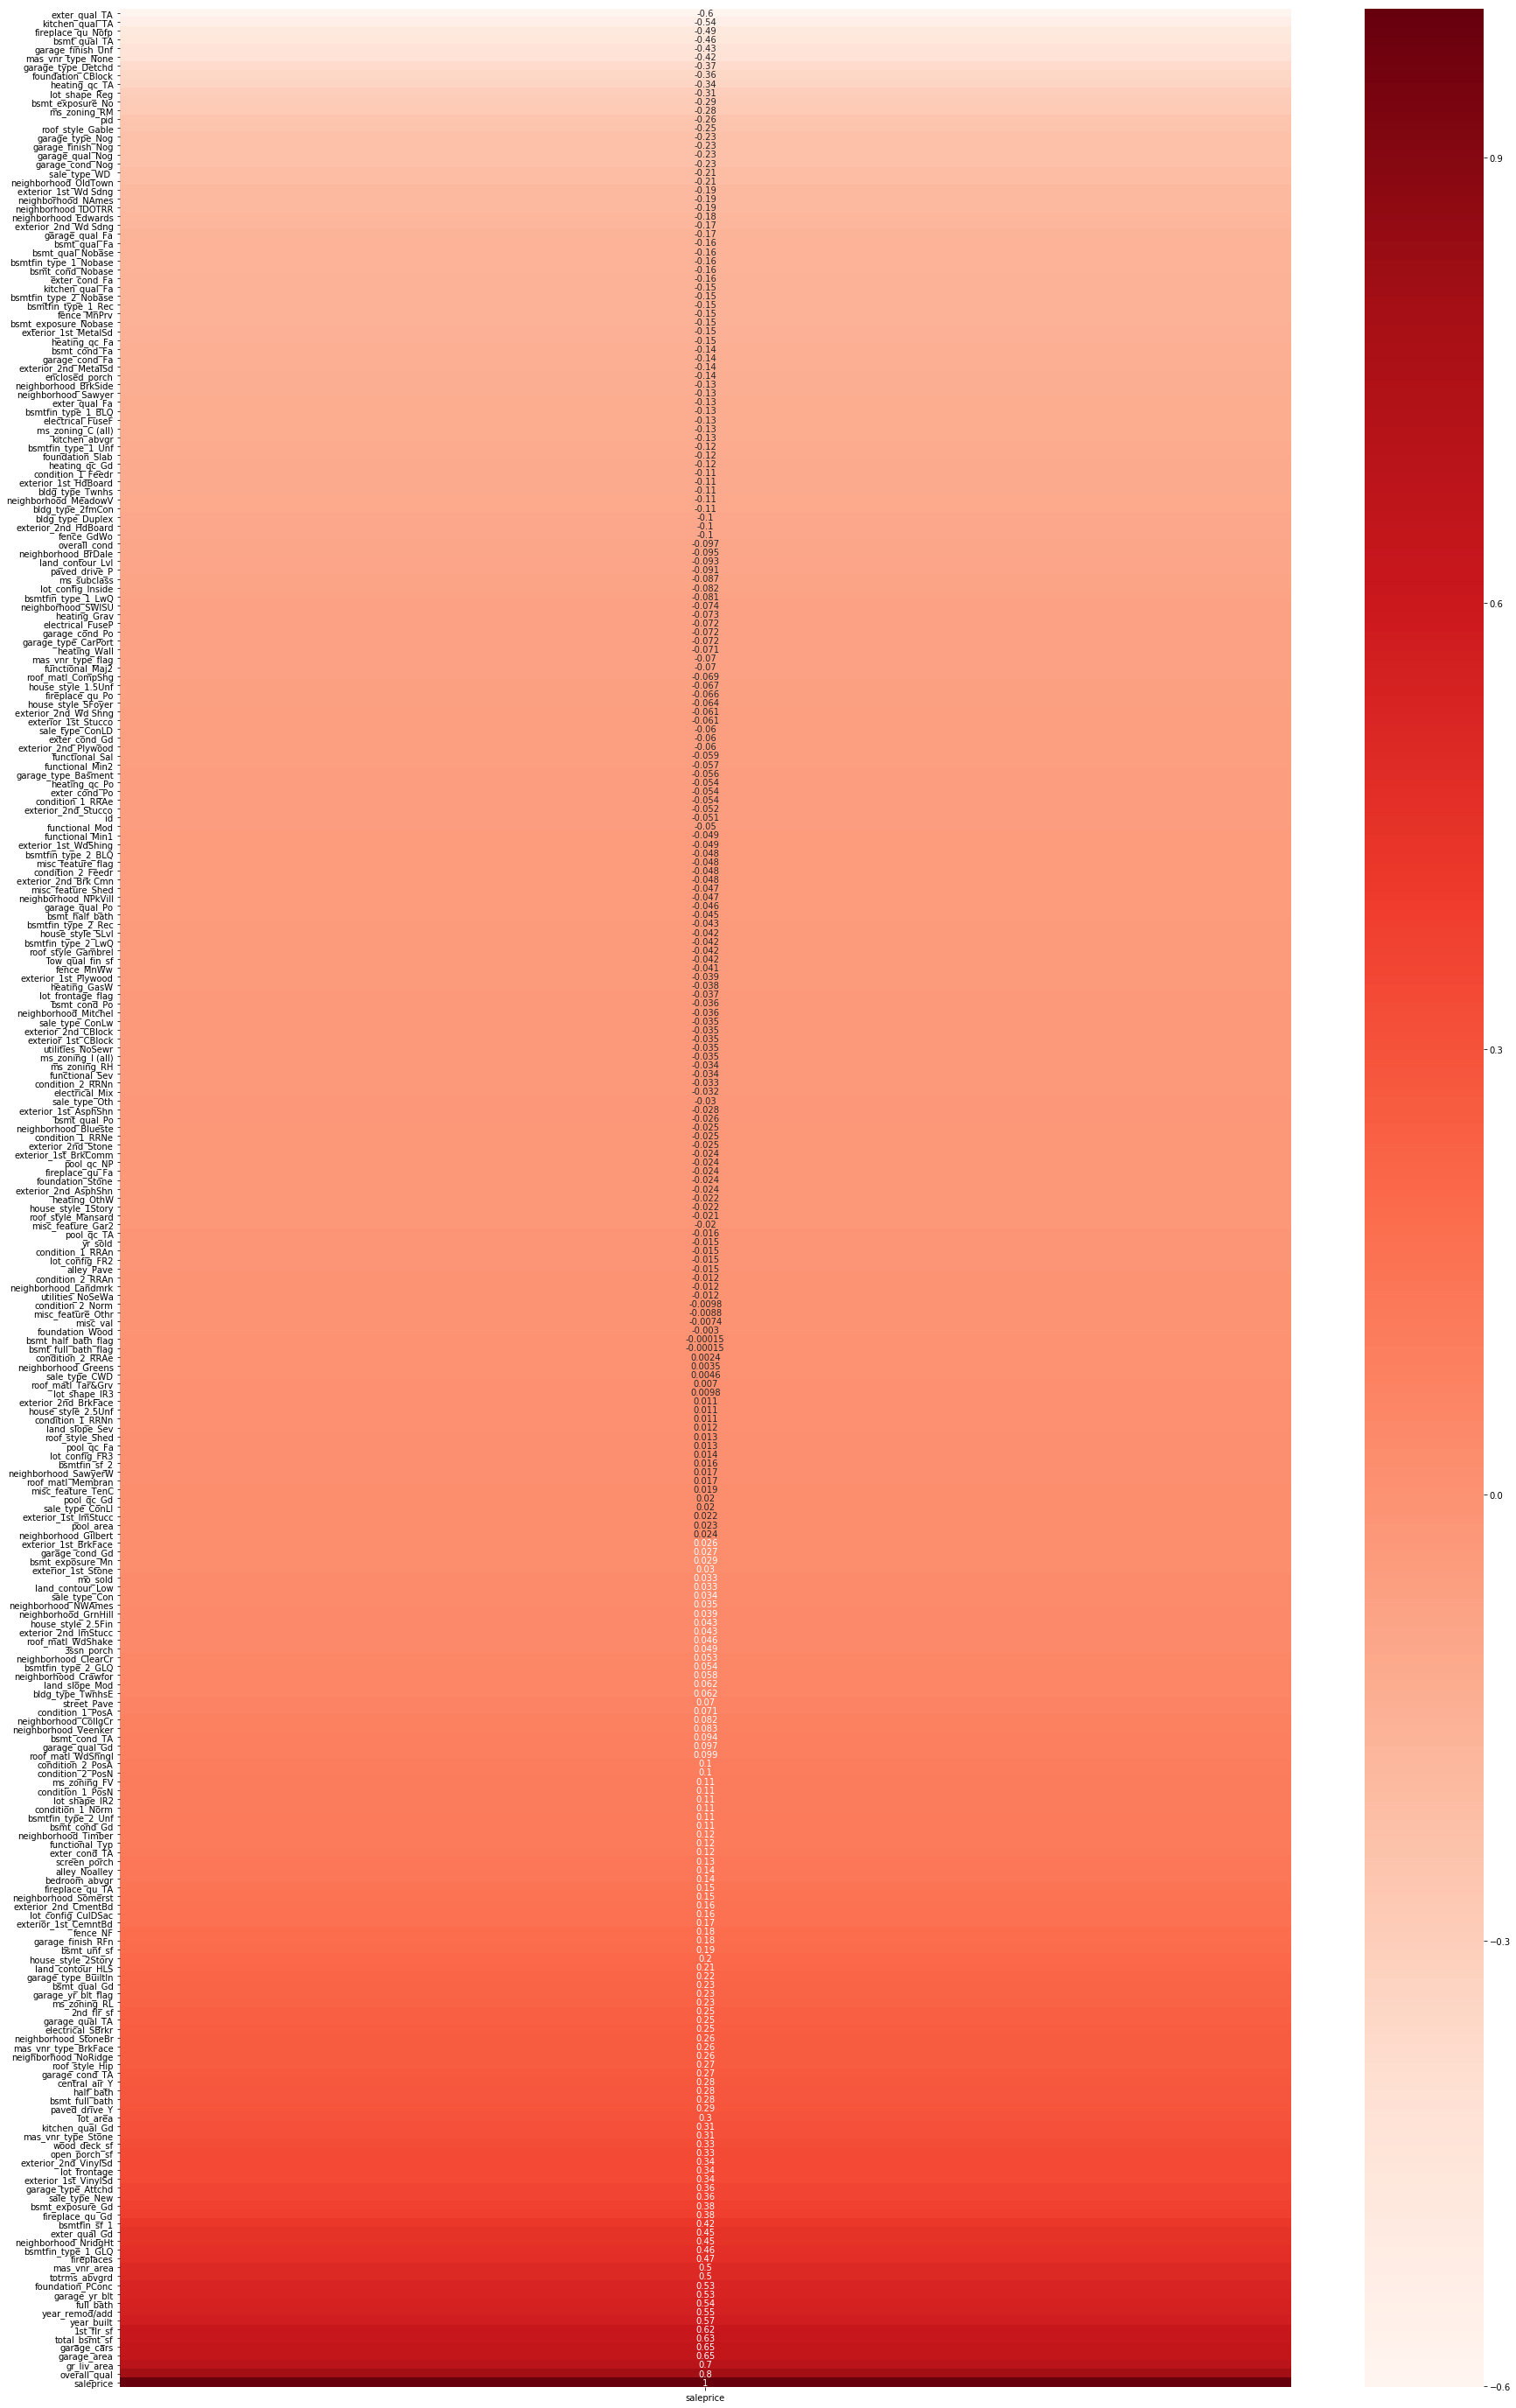

In [2138]:
plt.figure(figsize=(30,50))
sns.heatmap(df[features].corr()[['saleprice']].sort_values('saleprice'), cmap='Reds', annot=True)

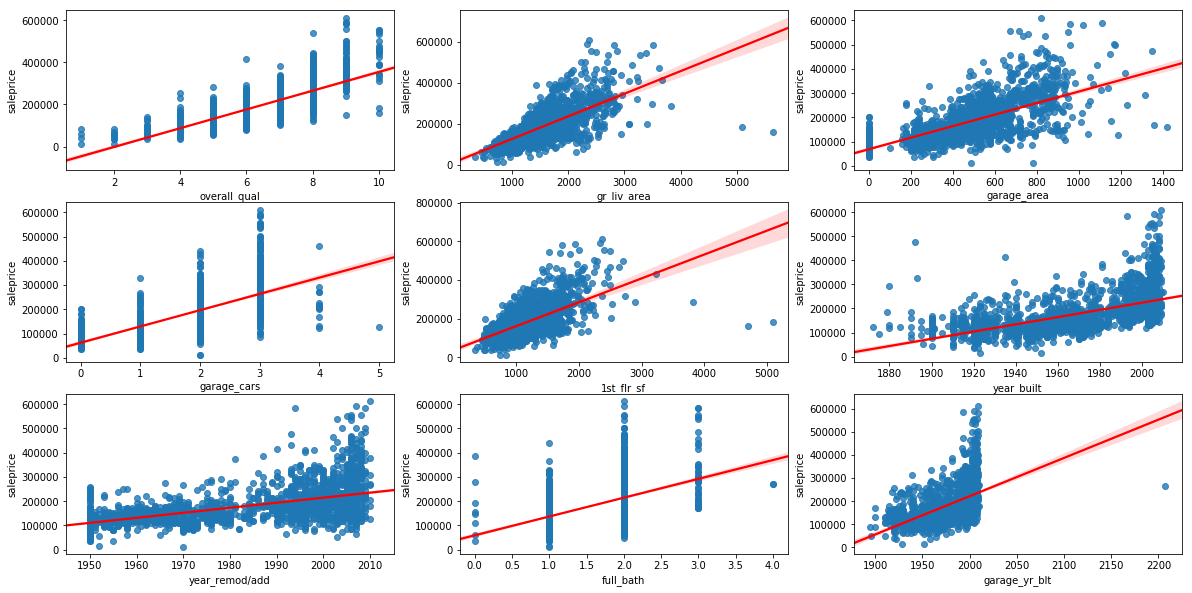

In [2139]:
f, axes = plt.subplots(3,3, figsize =(20,10))
plt.subplot(3,3,1)
sns.regplot(df.overall_qual, df.saleprice, line_kws={'color':'red'})
plt.subplot(3,3,2)
sns.regplot(df.gr_liv_area, df.saleprice, line_kws={'color':'red'})
plt.subplot(3,3,3)
sns.regplot(df.garage_area, df.saleprice, line_kws={'color':'red'})
plt.subplot(3,3,4)
sns.regplot(df.garage_cars, df.saleprice, line_kws={'color':'red'})
plt.subplot(3,3,5)
sns.regplot(df['1st_flr_sf'], df.saleprice, line_kws={'color':'red'})
plt.subplot(3,3,6)
sns.regplot(df.year_built, df.saleprice, line_kws={'color':'red'})
plt.subplot(3,3,7)
sns.regplot(df['year_remod/add'], df.saleprice, line_kws={'color':'red'})
plt.subplot(3,3,8)
sns.regplot(df.full_bath, df.saleprice, line_kws={'color':'red'})
plt.subplot(3,3,9)
sns.regplot(df.garage_yr_blt, df.saleprice, line_kws={'color':'red'})

#NOTE Garage Built year has an outlier for year 2200

In [2140]:
#New Feature list based on correlation. Those greater than .5 to saleprice
features = [x for x in df.columns if (abs(df[x].corr(df['saleprice'])) >= .5)]
features.remove('garage_yr_blt')
features.remove('saleprice')
features.remove('exter_qual_TA')
features.remove('foundation_PConc')
features.remove('kitchen_qual_TA')
features.remove('mas_vnr_area')
X = df[features]
y = df['saleprice']
features

['overall_qual',
 'year_built',
 'year_remod/add',
 'total_bsmt_sf',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'garage_cars',
 'garage_area']

In [2141]:
dft = pd.read_csv('..//project-2//datasets//test.csv')

In [2142]:
# Importing testing data


dft.rename(columns= lambda x: x.replace(' ', '_'), inplace=True)
dft.columns = dft.columns.str.lower()

dftdum = dummylist
dft = pd.get_dummies(dft, columns=dftdum, drop_first=True) 

#Fixing data types seen by dummy set 
dft.bsmtfin_sf_1 = [int(x) for x in dft.bsmtfin_sf_1]
dft.bsmtfin_sf_2 = [int(x) for x in dft.bsmtfin_sf_2]
dft.bsmt_unf_sf = [int(x) for x in dft.bsmt_unf_sf]
dft.total_bsmt_sf = [int(x) for x in dft.total_bsmt_sf]
dft.garage_cars = [float(x) for x in dft.garage_cars]   
dft.garage_area =[float(x) for x in dft.garage_area]
Xt = dft[features]



In [2143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 10 columns):
overall_qual      2051 non-null int64
year_built        2051 non-null int64
year_remod/add    2051 non-null int64
total_bsmt_sf     2051 non-null int64
1st_flr_sf        2051 non-null int64
gr_liv_area       2051 non-null int64
full_bath         2051 non-null int64
totrms_abvgrd     2051 non-null int64
garage_cars       2051 non-null float64
garage_area       2051 non-null float64
dtypes: float64(2), int64(8)
memory usage: 160.3 KB


In [2144]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 10 columns):
overall_qual      879 non-null int64
year_built        879 non-null int64
year_remod/add    879 non-null int64
total_bsmt_sf     879 non-null int64
1st_flr_sf        879 non-null int64
gr_liv_area       879 non-null int64
full_bath         879 non-null int64
totrms_abvgrd     879 non-null int64
garage_cars       879 non-null float64
garage_area       879 non-null float64
dtypes: float64(2), int64(8)
memory usage: 68.8 KB


In [2145]:
X = np.asanyarray(X)
Xt= np.asanyarray(Xt)

In [2146]:
X.shape

(2051, 10)

In [2147]:
Xt.shape

(879, 10)

In [2148]:
#Standard Scaling
ss = StandardScaler()
ss.fit(X)
X_train = ss.transform(X)
X_test = ss.transform(Xt)

In [2149]:
lr = LinearRegression()
lr.fit(X_train, y)
lrpred = lr.predict(X_test)
lrdata = pd.DataFrame(lrpred)

In [2150]:
lrdata.columns = ['SalePrice']
lrdata.head()
indexid = pd.DataFrame(dft.id)
Sub = pd.merge(lrdata, indexid, left_index=True, right_index=True)
Sub = pd.DataFrame(Sub)
Sub = Sub[['id', 'SalePrice']]
Sub.columns = ['Id', 'SalePrice']

In [2151]:
Sub.to_csv('P2EW.csv', index=False)

In [ ]:
#RMSE
np.sqrt(mean_squared_error(y, lrpred))

## Second Attempt to reduce MSE with Flagging

In [ ]:
#Fitting features for SS
df2 = df[(df.lot_frontage_flag == 1) & (df.mas_vnr_type_flag == 1)  & (df.bsmt_full_bath_flag == 1) & (df.garage_yr_blt_flag == 1)]
features = ['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath']
X = df2[features]
y = df2['saleprice']

In [ ]:
#Standard Scaling
ss = StandardScaler()
ss.fit(X)
X_train = ss.transform(X)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y)
lrpred = lr.predict(X_train)
lr.score(X_train, y)

In [ ]:
mean_squared_error(y, lrpred)

In [ ]:
np.sqrt(mean_squared_error(y, lrpred))

## Third attempt, Flagging, combined with different features

In [ ]:
#Fitting features for SS
df2 = df[(df.lot_frontage_flag == 1) & (df.mas_vnr_type_flag == 1)  & (df.bsmt_full_bath_flag == 1) & (df.garage_yr_blt_flag == 1)]
features = ['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath']
X = df2[features]
y = df2['saleprice']

In [ ]:
#Standard Scaling
ss = StandardScaler()
ss.fit(X)
X_train = ss.transform(X)
X-test

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y)
lrpred = lr.predict(X_test)


In [ ]:
mean_squared_error(y, lrpred)

In [ ]:
np.sqrt(mean_squared_error(y, lrpred))